In [138]:
import numpy as np
from pandas_datareader import data as wb
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
TSLA = wb.DataReader('TSLA',data_source = 'yahoo', start= '1955-1-1')

In [140]:
TSLA.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-06-29,5.000,3.508,3.800,4.778,93831500.0,4.778
2010-06-30,6.084,4.660,5.158,4.766,85935500.0,4.766
2010-07-01,5.184,4.054,5.000,4.392,41094000.0,4.392
2010-07-02,4.620,3.742,4.600,3.840,25699000.0,3.840
2010-07-06,4.000,3.166,4.000,3.222,34334500.0,3.222


In [141]:
TSLA.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-11-20,502.500000,489.059998,497.989990,489.609985,32807300.0,489.609985
2020-11-23,526.000000,501.790009,503.500000,521.849976,50260300.0,521.849976
2020-11-24,559.989990,526.200012,540.400024,555.380005,53648500.0,555.380005
2020-11-25,574.000000,545.369995,550.059998,574.000000,48930200.0,574.000000
2020-11-27,598.780029,578.450012,581.159973,585.760010,37561100.0,585.760010


In [142]:
#return 
TSLA['simple_return'] = (TSLA['Adj Close']/TSLA['Adj Close'].shift(1)) - 1



In [143]:
print(TSLA['simple_return'])

Date
2010-06-29         NaN
2010-06-30   -0.002512
2010-07-01   -0.078472
2010-07-02   -0.125683
2010-07-06   -0.160938
                ...   
2020-11-20   -0.019348
2020-11-23    0.065848
2020-11-24    0.064252
2020-11-25    0.033527
2020-11-27    0.020488
Name: simple_return, Length: 2624, dtype: float64


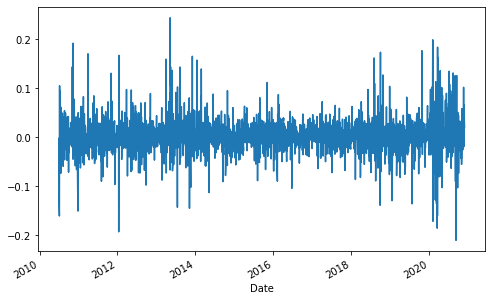

In [144]:
TSLA['simple_return'].plot(figsize=(8,5))

In [145]:
avg_return = TSLA['simple_return'].mean()*250

In [146]:
print(avg_return)

0.6149142129563313


In [147]:
print(str(round(avg_return,5)*100))

61.49099999999999


In [148]:
#simple return forumla ( p1/p0 - 1)
#another way is logarithmic return

#vectorization = array programming
TSLA['log_return'] = np.log(TSLA['Adj Close']/TSLA['Adj Close'].shift(1))

In [149]:
print(TSLA['log_return'])

Date
2010-06-29         NaN
2010-06-30   -0.002515
2010-07-01   -0.081723
2010-07-02   -0.134312
2010-07-06   -0.175470
                ...   
2020-11-20   -0.019538
2020-11-23    0.063771
2020-11-24    0.062272
2020-11-25    0.032977
2020-11-27    0.020281
Name: log_return, Length: 2624, dtype: float64


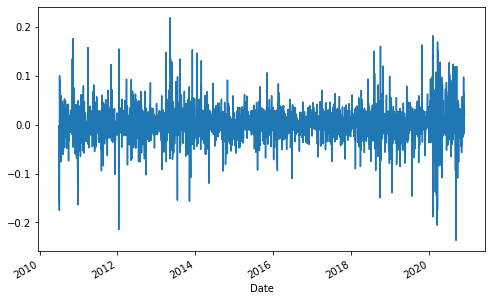

In [150]:
TSLA['log_return'].plot(figsize=(8,5))

In [151]:
#logarithmic is better to calcualte securities over a perido of time
#rate of return t* weight in portfolio 
'''
for example i ahve 25 percent of my income given to each stock i have 25 percent tesla, 25% google , 25% apple and 25 %yahoo , so my total rate of return would be 25&of return from apple  + 25%of return google and so on , and it would be my total return on the portfolio
'''

'\nfor example i ahve 25 percent of my income given to each stock i have 25 percent tesla, 25% google , 25% apple and 25 %yahoo , so my total rate of return would be 25&of return from apple  + 25%of return google and so on , and it would be my total return on the portfolio\n'

In [152]:
tickers = ['PG','AAPL','MSFT','TSLA']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo',start='1995-1-1')['Adj Close']

In [153]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6524 entries, 1995-01-03 to 2020-11-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6524 non-null   float64
 1   AAPL    6524 non-null   float64
 2   MSFT    6524 non-null   float64
 3   TSLA    2624 non-null   float64
dtypes: float64(4)
memory usage: 254.8 KB


In [154]:
mydata.head()

,PG,AAPL,MSFT,TSLA
Date,,,,
1995-01-03,8.215732,0.289867,2.394761,NaN
1995-01-04,8.149876,0.297421,2.412169,NaN
1995-01-05,8.034625,0.293644,2.372380,NaN
1995-01-06,8.051086,0.317249,2.412169,NaN
1995-01-09,8.018162,0.311230,2.397249,NaN


In [155]:
mydata.tail()

,PG,AAPL,MSFT,TSLA
Date,,,,
2020-11-20,139.300003,117.339996,210.389999,489.609985
2020-11-23,138.759995,113.849998,210.110001,521.849976
2020-11-24,138.309998,115.169998,213.860001,555.380005
2020-11-25,138.679993,116.029999,213.869995,574.000000
2020-11-27,138.610001,116.589996,215.229996,585.760010


In [156]:
mydata.iloc[0]
#gets first row of entire data

PG      8.215732
AAPL    0.289867
MSFT    2.394761
TSLA         NaN
Name: 1995-01-03 00:00:00, dtype: float64

In [157]:
mydata['TSLA'].replace(np.nan,1)

Date
1995-01-03      1.000000
1995-01-04      1.000000
1995-01-05      1.000000
1995-01-06      1.000000
1995-01-09      1.000000
                 ...    
2020-11-20    489.609985
2020-11-23    521.849976
2020-11-24    555.380005
2020-11-25    574.000000
2020-11-27    585.760010
Name: TSLA, Length: 6524, dtype: float64

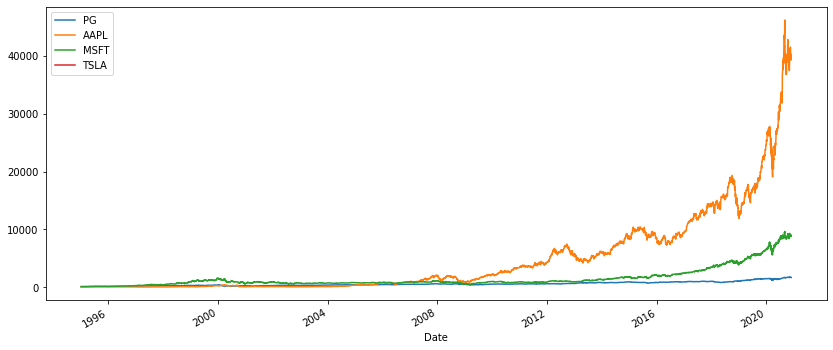

In [158]:
(mydata/mydata.iloc[0]*100).plot(figsize= (14,6))
plt.show()

In [159]:
mydata.loc['1995-01-03']

PG      8.215732
AAPL    0.289867
MSFT    2.394761
TSLA         NaN
Name: 1995-01-03 00:00:00, dtype: float64

In [160]:
mydata.iloc[0]

PG      8.215732
AAPL    0.289867
MSFT    2.394761
TSLA         NaN
Name: 1995-01-03 00:00:00, dtype: float64

In [161]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,PG,AAPL,MSFT,TSLA
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.026059,0.007269,NaN
1995-01-05,-0.014141,-0.012698,-0.016495,NaN
1995-01-06,0.002049,0.080386,0.016772,NaN
1995-01-09,-0.004089,-0.018973,-0.006185,NaN


In [162]:
weights = np.array([0.25,0.25,0.25,0.25])


In [163]:
np.dot(returns,weights)

array([       nan,        nan,        nan, ..., 0.02261281, 0.01092892,
       0.00779211])

In [164]:
annual_returns = returns.mean()* 250
annual_returns


PG      0.133990
AAPL    0.328883
MSFT    0.222541
TSLA    0.614914
dtype: float64

In [165]:
np.dot(annual_returns,weights)

0.32508196425529134

In [168]:
weights_2 = np.array([0.4,0.4,0.15,0.05])
portfolio_2 = str(round(np.dot(annual_returns,weights_2),5)*100) + '%'



24.928%


In [169]:
print(portfolio_2)

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(portfolio_2)? (<ipython-input-169-b906c0b8443f>, line 1)